# Project Description

Build a predictive model to predict whether a person makes more than 50K a year.

In [253]:
# %load ../../../../useful_codes/importing_code.py
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
%config Completer.use_jedi = False

from matplotlib import rcParams 
rcParams['figure.figsize'] = 15,6

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [254]:
# column names in the dataset
col_names = ['age','workclass','fnlwgt','education','education_num','marital_status',\
            'occupation','relationship','race','sex','capital_gains','capital_losses',\
            'hrs_per_week','native_country','salary']

In [255]:
df = pd.read_csv('../../data/adult_training_data.csv', header=None,\
                 names=col_names, na_values='?', sep=', ')

<ipython-input-255-3195581f440e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../../data/adult_training_data.csv', header=None,\


## Summary Stats 

In [261]:
df.shape

(32561, 18)

In [256]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gains        0
capital_losses       0
hrs_per_week         0
native_country     583
salary               0
dtype: int64

In [258]:
df['missing_workclass'] = np.where(df.workclass.isnull(),1,0)
df['missing_occupation'] = np.where(df.occupation.isnull(),1,0)
df['missing_country'] = np.where(df.native_country.isnull(),1,0)

In [ ]:
df['missing_occupation'] = np.where(df.occupation.isnull(),1,0)

In [257]:
df['missing_country'] = np.where(df.native_country.isnull(),1,0)

In [262]:
df.groupby(['missing_workclass','missing_occupation','missing_country']).size()

missing_workclass  missing_occupation  missing_country
0                  0                   0                  30162
                                       1                    556
                   1                   0                      7
1                  1                   0                   1809
                                       1                     27
dtype: int64

same rows missing workclass are also missing occupation. 

In [260]:
df.describe()

,age,fnlwgt,education_num,capital_gains,capital_losses,hrs_per_week,missing_country,missing_workclass,missing_occupation
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.017905,0.056386,0.056601
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.132608,0.230670,0.231083
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000


## Univariate Analysis 

**Distribution of Age**

/Users/nagakamisetti/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

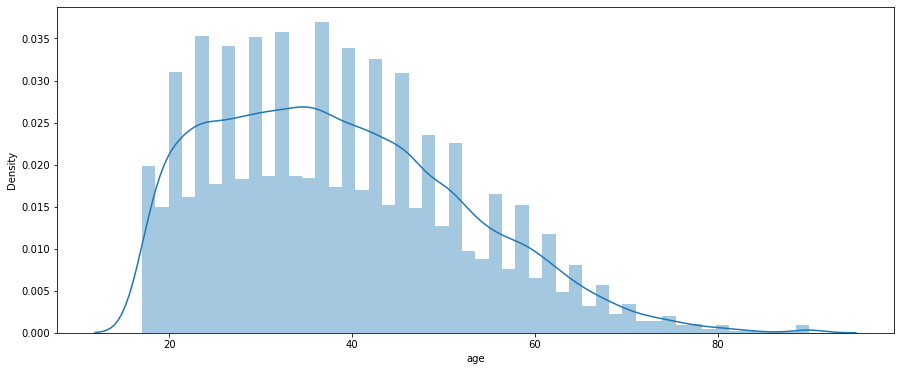

In [263]:
sns.distplot(df.age)

In [264]:
df.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gains', 'capital_losses', 'hrs_per_week',
       'native_country', 'salary', 'missing_country', 'missing_workclass',
       'missing_occupation'], dtype=object)

**Distribution of fnlwgt**

/Users/nagakamisetti/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

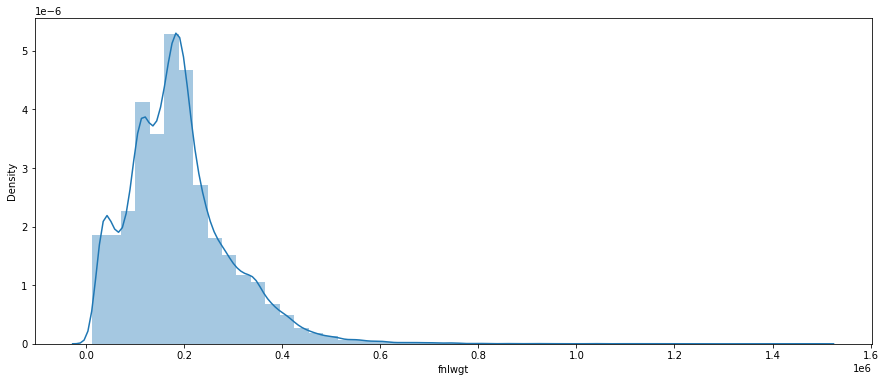

In [265]:
sns.distplot(df.fnlwgt)

In [266]:
df.fnlwgt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [ ]:
# I don't think this is a important variable for predicting income


In [ ]:
df.education.unique()

In [ ]:
df.marital_status.unique()

In [ ]:
df.head()

In [ ]:
df.salary.value_counts(normalize=True)

In [ ]:
df['income_class'] = np.where(df.salary=='>50K',1,0)

In [ ]:
df.income_class.value_counts(normalize=True)

In [ ]:
df.describe()

In [ ]:
df.workclass.value_counts()

In [ ]:
df.columns.values

In [ ]:
df['worktype'] = np.where(df.workclass.isin(['Local-gov','State-gov','Federal-gov']),'Government',df.workclass)

In [ ]:
df['worktype'] = np.where(df.worktype.isin(['Self-emp-not-inc','Self-emp-inc']),'Self-Employed',df.worktype)

In [ ]:
df['worktype'] = np.where(df.worktype.isin(['Without-pay','Never-worked']),'no-pay',df.worktype)

In [ ]:
df.worktype.value_counts()

In [ ]:
plt.hist(df.fnlwgt)

In [ ]:
df.education.unique()

In [ ]:
education_cnt = {}

In [ ]:
for idx,val in df.education.value_counts().items():
    education_cnt[idx] = val

In [ ]:
education_cnt

In [ ]:
education_cnt.keys()

In [ ]:
education_cnt.values()

In [ ]:
plt.bar(education_cnt.keys(), education_cnt.values())

In [ ]:
df.education.value_counts().plot(kind='bar')
plt.title('Distribution of Education Variable')
plt.ylabel('Number of people')

In [ ]:
df.education.value_counts()

In [ ]:
plt.hist(df.education_num)

In [ ]:
df.marital_status.value_counts().plot(kind='bar')

In [ ]:
df.occupation.value_counts().plot(kind='bar')

In [ ]:
df.relationship.value_counts().plot(kind='bar')

In [ ]:
df.race.value_counts().plot(kind='bar')

In [ ]:
income_race_df = df.groupby(['race','income_class']).size().groupby(['race']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df.sex.value_counts().plot(kind='bar')

In [ ]:
df.groupby(['sex','income_class']).size().groupby(['sex']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df['reported_capital_gains'] = np.where(df.capital_gains>0,1,0)
df['reported_capital_losses'] = np.where(df.capital_losses>0,1,0)
df['is_investor'] = np.where(((df.capital_gains>0)|(df.capital_losses>0)),1,0)

In [ ]:
df.is_investor.value_counts()#.plot(kind='bar')

In [ ]:
df.reported_capital_gains.value_counts()

In [ ]:
df.reported_capital_losses.value_counts()

In [ ]:
2712+1519

In [ ]:
df.groupby(['is_investor','income_class']).size().groupby(['is_investor']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df['works_overtime'] = np.where(df.hrs_per_week>40,1,0)

In [ ]:
df['works_parttime'] = np.where(df.hrs_per_week<40,1,0)

In [ ]:
df.groupby(['works_overtime','income_class']).size().groupby(['works_overtime']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df['is_immigrant'] = np.where(df.native_country=='United-States',0,1)

In [ ]:
df.is_immigrant.value_counts()

In [ ]:
df.groupby(['is_immigrant','income_class']).size()\
.groupby(['is_immigrant']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df.groupby(['reported_capital_losses','income_class']).size()\
.groupby(['reported_capital_losses']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df.groupby(['reported_capital_gains','income_class']).size()\
.groupby(['reported_capital_gains']).apply(lambda x: x*100/x.sum()).unstack().reset_index()

In [ ]:
df.dtypes


In [ ]:
df.columns.values